### Проект 10

# Тема: Метрики качества бинарной классификации

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Вычисление метрик качества в задаче бинарной классификации:

Генерируем данные:

In [ ]:
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=10,
                          n_redundant=0,
                          n_classes=2,
                          random_state=42)

Разделим данные на обучающую и тестовую части:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
X_test.shape[0]

150

Создаём модель (объект класса) логистической регрессии и обучаем модель:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Предсказываем на тестовых данных:

In [ ]:
y_test_pred = model.predict(X_test)

Выведем матрицу ошибок:

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[57, 15],
       [ 9, 69]])

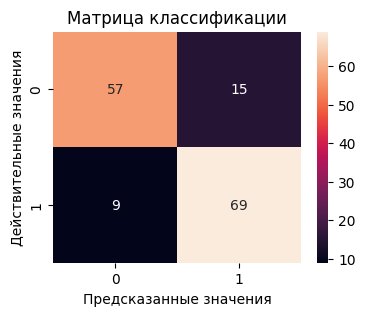

In [ ]:
plt.figure(figsize = (4, 3))
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

Вычислим метрики accuracy и F1:

In [ ]:
accuracy_score(y_test, y_test_pred)

0.84

In [ ]:
f1_score(y_test, y_test_pred)

0.8518518518518519

# Задания для самостоятельного выполнения:

### 1. Загрузите данные о сердечных приступах.
Указание: Данные можно скачать тут: [heart](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

Описание данных:

age: Возраст пациента

sex: Пол пациента

cp: тип боли в груди, 0 = типичная стенокардия, 1 = атипичная стенокардия, 2 = неангинальная боль, 3 = бессимптомная.

trtbps: кровяное давление в состоянии покоя (в мм рт. ст.).

chol: Холесторал в мг/дл, полученный с помощью датчика ИМТ.

fbs: (уровень сахара в крови натощак > 120 мг/дл), 1 = верно, 0 = неверно

restecg: результаты электрокардиографии в покое, 0 = норма, 1 = норма ST-T, 2 = гипертрофия левого желудочка.

thalachh: достигнута максимальная частота сердечных сокращений

exng: Стенокардия, вызванная физической нагрузкой ~ 1 = Да, 0 = Нет

oldpeak: предыдущий пик

slp: Наклон

caa: Количество крупных сосудов

thall: Результат стресс-теста на талия ~ (0,3)

output(целевая переменная): 0 = меньше шансов на сердечный приступ 1 = больше шансов на сердечный приступ

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Выведите информацию о загруженном датасете, его размер и описательную статистику. Проверьте данные на наличие пропущенных значений.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


### 3. Разделите данные на признаки и целевую переменную. Убедитесь, что целевая переменная принимает только два значения, т.е. решается задача бинарной классификации. Представьте признаки и целевую переменную в виде numpy-массивов.
Указание: Целевым значением будет _output_. Вынесите этот столбец в отдельную переменную _y_, а в переменную _X_ запишите все столбцы из таблицы данных, удалив столбец _output_. Далее используйте метод _.to_numpy()_.

In [ ]:
if len(df['output'].unique()) != 2:
    print('Целевая переменная не бинарна')

X = df.drop('output', axis = 1).to_numpy()
y = df['output'].to_numpy()

print(X[:5])
print(y)

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
df['output'].nunique()

2

In [ ]:
df['output'].value_counts()

,count
output,
1,165
0,138


### 4. Разделите данные на обучающую и тестовую части, величина которой составляет 20%. Зафиксируйте способ воспроизведения разбиения random_state=0. Выведите их размеры. Выведите количество элементов в каждом классе тестовой части целевой переменной.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('train:', X_train.shape[0])
print('test:', X_test.shape[0])

train: 242
test: 61


In [ ]:
unique, counts = np.unique(y_test, return_counts = True)
print(dict(zip(unique, counts)))

{0: 27, 1: 34}


In [ ]:
pd.Series(y_test).value_counts()

,count
1,34
0,27


### 5. Постройте модель классификации методом логистической регрессии для предсказания наличия заболевания. Выведите, полученные коэффициенты разделяющей гиперплоскости.
Указение: Используйте класс [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Подберите нужное количество _max_iter_, остальные параметры используйте по умолчанию. Обучите модель на обучающих данных.

In [ ]:
model = LogisticRegression(max_iter=900)
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [ ]:
model.intercept_

array([2.65133956])

In [ ]:
model.coef_

array([[-0.00542473, -1.58025924,  0.75100203, -0.01143858, -0.00423131,
        -0.31347248,  0.17338957,  0.02309348, -0.87237194, -0.5590602 ,
         0.1845353 , -0.84971225, -0.70930042]])

### 6. Сделайте предсказание на тестовых данных. Найдите количество ошибок прогноза.
Указание: Найдите количество совпавших значений в _y_test_ и _y_test_pred_.

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
errs = np.sum(y_test != y_test_pred)

print(f"Количество ошибок: {errs}")

Количество ошибок: 9


### 7. Вычислите количество единиц, предсказанных, как единицы, обозначьте это значение _TP_. Вычислите количество нулей, предсказанных, как нули, обозначьте это значение _TN_. Вычислите количество нулей, предсказанных, как единицы, обозначьте это значение _FP_. Вычислите количество единиц, предсказанных, как нули, обозначьте это значение _FN_.

In [ ]:
TP = ((y_test_pred == 1) & (y_test == 1)).sum()
TN = ((y_test_pred == 0) & (y_test == 0)).sum()
FP = ((y_test_pred == 1) & (y_test == 0)).sum()
FN = ((y_test_pred == 0) & (y_test == 1)).sum()

In [ ]:
TP, TN, FP, FN

(31, 21, 6, 3)

### 8. Выведите матрицу ошибок классификации на тестовых данных.
Указание: Воспользуйтесь библиотекой [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Выведите эту матрицу на тепловой карте.

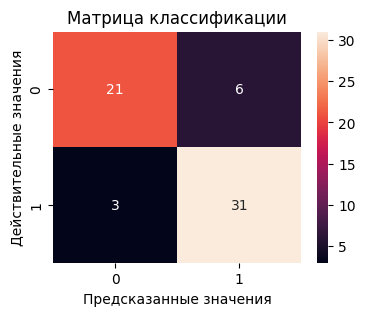

In [ ]:
plt.figure(figsize = (4, 3))
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

### 9. Наришите функцию, вычисляющую метрику _accuracy_.
Указание: $accuracy = \frac{TP +TN}{TP +FP + TN +FN}$. Пусть функция принимает два вектора - истинные и предсказанные значения. Позитивным классом по умолчанию считается единица, а негативным - ноль.

In [ ]:
def my_accuracy(y_true, y_pred):
    TP = ((y_pred == 1) & (y_true == 1)).sum()
    TN = ((y_pred == 0) & (y_true == 0)).sum()
    FP = ((y_pred == 1) & (y_true == 0)).sum()
    FN = ((y_pred == 0) & (y_true == 1)).sum()
    return (TP+TN)/(TP+FP+TN+FN)

In [ ]:
my_accuracy(y_test,y_test_pred)

0.8524590163934426

### 10. Вычислите метрику _accuracy_, используя библиотечные функции двумя способами. На основе значения этой метрики сделайте предположение о качестве обучающей способности модели.
Указание: Используйте функцию [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) и метод _.score(X_test, y_test)_. Убедитесь, что значения совпадают.

In [ ]:
accuracy = accuracy_score(y_test,y_test_pred)
accuracy

0.8524590163934426

In [ ]:
model.score(X_test,y_test)

0.8524590163934426

### 11. Вычислите метрику _precision_, написав функцию своими руками и используя библиотечную функцию.
Указание: $presision = \frac{TP}{TP + FP}$. Используйте функцию [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

In [ ]:
def precision(y_true, y_pred):
    TP = ((y_pred == 1) & (y_true == 1)).sum()
    FP = ((y_pred == 1) & (y_true == 0)).sum()
    return TP / (TP + FP)

precision(y_test, y_test_pred), precision_score(y_test, y_test_pred)

(0.8378378378378378, 0.8378378378378378)

### 12. Вычислите метрику _recall_, написав функцию своими руками и используя библиотечную функцию.
Указание: $recall = \frac{TP}{TP + FN}$. Используйте функцию [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

In [ ]:
def recall(y_true, y_pred):
    TP = ((y_pred == 1) & (y_true == 1)).sum()
    FN = ((y_pred == 0) & (y_true == 1)).sum()
    return TP / (TP + FN)

recall(y_test, y_test_pred), recall_score(y_test, y_test_pred)

(0.9117647058823529, 0.9117647058823529)

### 13. Вычислите метрику _F1_, написав функцию своими руками и используя библиотечную функцию.
Указание: $F_1 = \frac{2*TP}{2*TP + FP + FN}$. Используйте функцию [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [ ]:
def F1(true, pred):
    TP = ((pred == 1) & (true == 1)).sum()
    FN = ((pred == 0) & (true == 1)).sum()
    FP = ((pred == 1) & (true == 0)).sum()
    return 2 * TP / (2 * TP + FP + FN)

In [ ]:
F1(y_test, y_test_pred)

0.8732394366197183

In [ ]:
f1_score(y_test, y_test_pred)

0.8732394366197183

### 14. Напишите функцию своими руками, которая вычисляет _precision_, _recall_, _F1_, если позитивным классом считать ноль, а негативным - единицу. Найдите те же метрики, используя библиотечные функции.
Указание: В библиотечных функциях, используйте параметр pos_label=0.

In [ ]:
def summary(true, pred):
    TP = ((pred == 0) & (true == 0)).sum()
    FN = ((pred == 1) & (true == 0)).sum()
    FP = ((pred == 0) & (true == 1)).sum()
    TN = ((pred == 1) & (true == 1)).sum()
    F1 = 2 * TP / (2 * TP + FP + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    return precision, recall, F1

In [ ]:
summary(y_test, y_test_pred)

(0.875, 0.7777777777777778, 0.8235294117647058)

In [ ]:
precision_score(y_test, y_test_pred, pos_label=0), recall_score(y_test, y_test_pred, pos_label=0), f1_score(y_test, y_test_pred, pos_label=0)

(0.875, 0.7777777777777778, 0.8235294117647058)

### 15. Выведите отчёт о классификации. Проанализируйте его.
Указание: Используйте библиотечную функцию [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Выводите отчёт о классификации только в _print_.

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



### 16. Добавьте масштабирование данных перед применением модели методом стандартной нормализации без применения _Pipeline_. Обучите модель, выведите коэффициенты гиперплоскости и вычислите метрики _accuracy_ и _F1_.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
coefficients, intercept

(array([[-0.07576825, -0.86429031,  0.79655037, -0.19301952, -0.24758209,
         -0.1338148 ,  0.09164008,  0.50482969, -0.4789035 , -0.64454714,
          0.13499188, -0.88364017, -0.45974755]]),
 array([0.11963924]))

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8524590163934426

In [ ]:
f1_score(y_test, y_test_pred)

0.8732394366197183

### 17. Выведите названия признаков рядом с полученными весами и оцените какой признак больше всего влияет на возможность сердечного приступа.

In [ ]:
new_df=df.drop('output', axis = 1).columns

In [ ]:
weights = model.coef_[0]
feature_names = new_df
features_importance = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
features_importance

,Feature,Weight
0,age,-0.075768
1,sex,-0.864290
2,cp,0.796550
3,trtbps,-0.193020
4,chol,-0.247582
5,fbs,-0.133815
6,restecg,0.091640
7,thalachh,0.504830
8,exng,-0.478904
9,oldpeak,-0.644547


In [ ]:
features_importance = features_importance.sort_values(by='Weight', ascending=False)

In [ ]:
features_importance

,Feature,Weight
2,cp,0.796550
7,thalachh,0.504830
10,slp,0.134992
6,restecg,0.091640
0,age,-0.075768
5,fbs,-0.133815
3,trtbps,-0.193020
4,chol,-0.247582
12,thall,-0.459748
8,exng,-0.478904


### 18. Добавьте масштабирование данных перед применением модели методом стандартной нормализации с использованием _Pipeline_. Обучите модель на обучающих данных и вычислите метрики _accuracy_ и _F1_ на тестовых данных.

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, f1

(0.8524590163934426, 0.8732394366197183)